In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 인공 신경망
* **인공신경망**(ANN, artificial neural networks)은 다재다능하고 강력하고 확장성이 좋다.

# 1. 생물학적 뉴런에서 인공 뉴런까지

## 1.1. 생물학적 뉴런

## 1.2. 뉴런을 사용한 논리 연산

## 1.3. 퍼셉트론
* **퍼셉트론**(Perceptron)은 가장 간단한 인공 신경망 구조 중 하나이다.
* **TLU**(threshold logic unit)라는 조금 다른 형태의 인공 뉴런을 기반으로 한다.

#### TLU
* 입력과 출력이 (이진 on/off 값이 아니라) 어떤 숫자고, 각각의 입력 연결은 가중치와 연관되어 있다.
* TLU 과정
    1. 입력의 가중치 합을 계산한다.  
        $z = w_1x_1 + w_2x_2 + \dots + w_nx_n = W^T \cdot X$
    2. 그런 다음 계산된 합에 **계단 함수**(step function)를 적용하여 그 결과를 출력한다.  
        $ h_w(X) = step(z) = step(W^T \cdot X)$

#### 퍼셉트론에서 가장 널리 사용되는 계단함수
* **헤비사이드 계단 함수**(Heaviside step function)
    * 가장 널리 사용된다.
    * 단위 계단 함수(unit step function)라고도 한다.
$$ \mbox{heaviside}(z) = 
\begin{cases} 
0 & z < 0 \mbox{일 때}\\
1 & z ≥ 0 \mbox{일 때}
\end{cases} $$
* 부호 함수(sign function)
$$ \mbox{sgn}(z) = 
\begin{cases}
-1 & z < 0 \mbox{일 때}\\
0 & z = 0 \mbox{일 때}\\
1 & z > 0 \mbox{일 때}
\end{cases} $$

#### 하나의 TLU 사용 예; 간단한 선형 이진 분류 문제에 사용
* (로지스틱 회귀 분류기나 선형 SVM처럼) 입력의 선형 조합을 계산해서 그 결과가 임곗값을 넘어서면 양성 클래스를 출력하고 그렇지 않으면 음성 클래스를 출력한다.
* ex)  
하나의 TLU를 이용해 (편향 특성 $x_0 = 1$을 추가해서) 꽃잎 길이와 너비를 기반으로 붓꽃의 품종을 분류할 수 있다.
* TLU를 훈련시킨다는 것은 최적의 $w_0, w_1, w_2$를 찾는다는 뜻이다.

#### 퍼셉트론
* 층이 하나뿐인 TLU로 구성된다.
* 각 뉴런은 모든 입력에 연결되어 있다. 
    * 이 연결은 **입력 뉴런**(input neuron)이라 부르는 특별한 통과 뉴런을 사용해 표현되곤 한다. 
    * 이 뉴런은 무엇이 주입되든 입력을 그냥 출력으로 통과시킨다.
* 보통 거기에 편향 특성($x_0 = 1$)이 더해진다.
    * 전형적으로 이 편향 특성은 항상 1을 출력하는 특별한 종류의 뉴런인 **편향 뉴런**(bias neuron)으로 표현된다.
    > 입력 뉴런은 그냥 입력값 자체를 말하며, 편향 뉴런은 신경망 그림에서 편의상 표시하지 않는 경우도 많다.
    
### 1.3.1. 퍼셉트론의 훈련
* 두 뉴런이 동일한 출력을 낼 때마다 그들 사이의 연결 가중치가 증가한다.
    * '서로 활성화되는 세포가 서로 연결된다'는 헤브의 규칙(또는 **헤브 학습**(Hebbian learning)의 아이디어를 이용
* 퍼셉트론은 네트워크가 만드는 에러를 반영하도록 조금 변형된 규칙을 사용하여 훈련된다.
    * 잘못된 출력을 만드는 연결은 강화시키지 않는다.
    * 구체적으로 퍼셉트론에 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어진다. 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 학습 규칙에 따라 연결된 가중치를 강화시킨다.

#### 퍼셉트론 학습 규칙(가중치 업데이트)
$$ w_{i, j}^{\mbox{next step}} = w_{i, j} + \eta(y_i - \hat y_j)x_i $$
* $w_{i, j}$ : $i$번째 입력 뉴런과 $j$번째 추렭 뉴런 사이를 연결하는 가중치
* $x_i$ : 현재 훈련 샘플의 $i$번째 뉴런의 입력값
* $\hat y_j$ : 현재 훈련 샘플의 $j$번째 출력 뉴런의 출력값
* $y_j$ : 현재 훈련 샘플의 $j$번째 출력 뉴런의 타깃값
* $\eta$ : 학습률

#### 퍼셉트론 수렴 이론
* 각 출력 뉴련의 결정 경계는 선형이므로 퍼셉트론도 (로지스틱 회귀 분류기처럼) 복잡한 패턴을 학습하지 못한다.
* 하지만 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 것이 **퍼셉트론 수렴 이론**(Perceptron convergence theorem)이다.

#### scikit-learn의 퍼셉트론
* scikit-learn은 하나의 TLU 네트워크를 구현한 `Perceptron` 클래스를 제공한다
> `sklearn.neural_network` 아래에 회귀와 분류의 다층 퍼셉트론 구현인 `MLPClassifier`와 `MLPRegressor`도 제공한다.
* `Perceptron` 클래스는 매개변수가 `loss='perceptron', learning_rate='constant', eta0=1(학습률), pernalty=None(규제없음)`인 `SGDClassifier`와 같다.
* 로지스틱 회귀 분류기와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만든다. 이런 이유로 퍼셉트론보다 로지스틱 회귀가 선호된다.

#### 붓꽃 데이터셋에 퍼셉트론 사용하기

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎 길이, 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

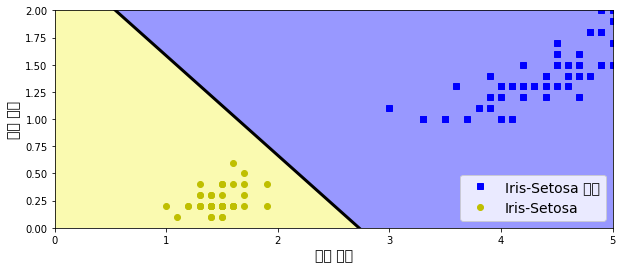

In [23]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

## 1.4. 다층 퍼셉트론과 역전파
* 여러 퍼셉트론을 쌓아올려 일부 제약을 줄이는 **다층 퍼셉트론**(MLP, Multi-Layer Perceptron) 인공 신경망은 퍼셉트론이 풀지 못하는 XOR문제를 풀 수 있다.
* 다층 퍼셉트론은 (통과) **입력층** 하나 + **은닉층**(hidden layer)이라는 하나 이상의 TLU층 + **출력층**(output layer)으로 구성된다.
* 출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어 있다.
* **심층 신경망**(DNN, deep neural network) : 인공 신경망의 은닉층이 2개 이상일 때

#### 역전파(backpropagation)
1. 알고리즘이 각 훈련 샘플을 네트워크에 주입하고 연속되는 각 층의 뉴런마다 출력을 계산한다 (정방향 계산)
2. 네트워크의 출력 오차(기댓값과 네트워크 실제 출력과의 차이)를 계산한다.
3. 각 출력 뉴런의 오차에 마지막 은닉층의 뉴런이 얼마나 기여했는지 측정한다.
> 여기서는 뉴런의 입력값에 대한 비용 함수의 편미분을 오차에 기여한 정도 또는 오차 그래디언트라고 표현한다.
4. 이전 은닉층의 뉴런이 여기에 또 얼마나 기여했는지 측정한다. 이런 식으로 입력층에 도달할 때까지 계속 측정한다.

이 역방향 과정은 오차 그래디언트를 후방으로 전파함으로써 네트워크의 모든 연결 가중치에 대한 오차 그래디언트를 효율적으로 계산한다(그래서 역전파라고 한다).
* 부록 D의 후진 모드 자동 미분 알고리즘을 보면 역전파의 정방향과 역방향 계산이 후진 모드 자동 미분을 수행하는 것임을 알 수 있다.
* 역전파 알고리즘의 마지막 단계는 앞서 계산한 오차 그래디언트를 네트워크의 모든 연결 가중치에 반영하는 경사 하강법 스텝이다.

#### 간단한 설명
1. 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고(정방향 계산), 오차를 측정하고, 
2. 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정한다(역방향 계산). 
3. 마지막으로 이 오차가 감소하도록 가중치를 조금씩 조정한다(경사하강법 스텝).

#### 역전파 알고리즘 활성화 함수
* 이 알고리즘을 잘 작동시키기 위해 계단 함수를 로지스틱 함수로 바꿔서 다층 퍼셉트론 구조에 변화를 주었다.  
$$ \sigma(z) = \frac{1}{1 + exp^{-z}}$$  
    * 계단 함수에는 수평선밖에 없으니 계산할 그래디언트가 없다(경사 하강법은 평편한 곳을 이동할 수 없다).
    * 반면 로지스틱 함수는 어디서든지 0이 아닌 그래디언트가 잘 정의되어 있다.
* 이처럼 역전파 알고리즘에 계단 함수나 로지스틱 함수 대신 다른 **활성화 함수**(activation function)도 사용할 수 있다.
* 널리 쓰이는 활성화 함수
    * **하이퍼볼릭 탄젠트 함수(쌍곡 탄젠트 함수))**  
        $$ \mbox{tanh} = 2\sigma(2z) -1 $$   
        * 로지스틱 함수처럼 S자 모양이고 연속적이며 미분 가능하다.
        * 출력범위가 -1 ~ 1이여서 훈련 초기에 각 층의 출력이 다소 정규화되는 경향이 있다(즉, 원점 주위로 몰리게 된다).
        * 이는 종종 빠르게 수렴되도록 도와준다.
    * **ReLU 함수**(9장 참조)  
        $$ \mbox{ReLU}(z) = \mbox{max}(0, z) $$    
        * 이 함수는 연속적이지만 $z = 0$에서는 미분이 불가능하다(기울기가 갑자기 변해서 경사 하강법이 엉뚱한 곳으로 튈 수 있다).
        > ReLU 함수 값이 0보다 클 때 기울기는 항상 1이므로 오차 그래디언트를 그대로  역전파 시킨다.  
        원점에서는 기울기가 정의되지 않지만 텐서플로를 포함해 일반적으로 0을 사용한다.  
        따라서 ReLU 함수 값이 0보다 작거나 같을 때는 오차 그래디언트를 역전파시키지 않는다.
        * 그러나 실제로는 잘 작동하고 계산 속도가 빠르다는 장점이 있다.
        * 무엇보다 중요한 점은 출력에 최댓값이 없다는 점이 경사 하강법에 있는 일부 문제를 완화해준다.
        > 로지스틱 함수나 하이퍼볼릭 탄젠트 함수는 출력 범위가 0~1 또는 -1~1 사이로 한정되어 양극단에서 기울기가 급격히 감소하므로 오차 그래디언트를 잘 역전파시키지 못한다.

In [24]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

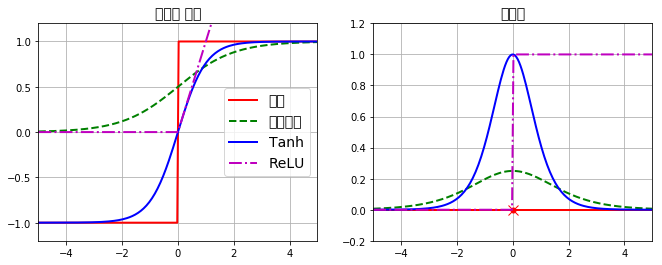

In [25]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="스텝")
plt.plot(z, logit(z), "g--", linewidth=2, label="로지스틱")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("활성화 함수", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("도함수", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [26]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

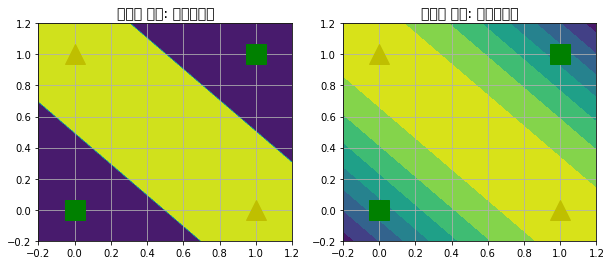

In [27]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 헤비사이드", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("활성화 함수: 시그모이드", fontsize=14)
plt.grid(True)

#### 다층 퍼셉트론과 분류
* 다층 퍼셉트론은 각 출력이 서로 다른 이진 클래스에 대응되는 분류 문제에 자주 사용된다.
* 클래스가 배타적일 때(예. 숫자 이미지 분류의 0 ~ 9까지 클래스일 때)는 전형적으로 출력층의 활성화 함수를 **소프트맥스**(softmax) 함수로 바꿔준다.
> 소프트맥스 함수의 분모는 모든 클래스의 출력에 지수 함수를 적용하여 더한 값이다. 그래서 소프트맥스 함수가 출력 뉴런 전체에 걸쳐 있다.
> 소프트맥스 함수  
$ \hat p_k = \sigma(s(X))_k = \frac{exp(s_k(X)}{\sum_{j=1}^K exp(s_j(X))} $
    * $K$ : 클래스 수
    * $s(X)$ : 샘플 $X$에 대한 각 클래스의 점수를 담은 벡터
    * $\sigma(s(X))_k$ : 샘플 $X$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률
* 각 뉴런의 출력은 이에 상응하는 클래스의 추정 확률이 된다.
* 신호가 (입력 → 출력) 한 방향으로만 흐르기 때문에 이런 구조를 **피드포워드 신경망**(FNN, feed forward neural network)이라고 한다.

# 2. 텐서플로의 고수준 API로 다층 퍼셉트론 훈련하기

#### 텐서플로로 다층 퍼셉트론(MLP)을 훈련시키는 가장 간단한 방법
scikit-learn과 호환되는 고수준 API인 `TF.Learn`을 사용하는 것
* `DNNClassifier` 클래스 : 여러 개의 은닉층과 클래스의 확률 추정을 위한 softmax 출력층으로 구성된 심층 신경망(DNN)을 매우 쉽게 훈련시켜준다.

#### MNIST를 위한 FNN
은닉층 2개(각각 뉴런 수 300개, 100개)와 10개의 뉴런을 가진 softmax 출력층 하나로 구성된 분류 문제용 심층 신경망(DNN) 훈련시키기

In [8]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28 * 28) / 255.0
y_train = y_train.astype(np.int32)
X_test = X_test.astype(np.float32).reshape(-1, 28 * 28) / 255.0
y_test = y_test.astype(np.int32)
X_vaild, X_train = X_train[:5000], X_train[5000:]
y_vaild, y_train = y_train[:5000], y_train[5000:]

## 2.1. Estimator API를 사용
> **CAUTION**
* `tf.examples.tutorials.mnist` - 삭제될 예정이므로 대신 `tf.keras.datasets.mnist`를 사용한다.
* `tf.contrib.learn` API : `tf.estimator`와 `tf.feature_column`으로 옮겨졌고 상당히 많이 바뀌었다.
    * 특히 `infer_real_valued_columns_from_input()` 함수와 `SKCompat` 클래스가 없어졌다.
    
**바뀐 것 때문에 과정 주의!!**

1. 먼저 훈련 세트로부터 실숫값으로 된 열을 만든다(범주형 같은 열도 가능하다).
 > `infer_real_valued_columns_from_input()` 함수는 `tf.contrib.learn` 하위의 `DNNClassifier`, `LinearClassifier`, `LinearRegressor` 등의 클래스에 정수/실수로 된 특성을 매핑하기 위한 `FeatureColumn` 객체를 만든다.  
범주형 데이터의 경우 `sparse_column_with_keys()` 함수 등을 사용할 수 있다.

2. `DNNClassifier`의 객체를 만들고 scikit-learn 인터페이스와 호환되게 만들어 주는 `SKCompat` 클래스로 감싼다.

3. 마지막으로 샘플이 50개인 배치로 훈련을 40,000번 반복한다.

In [11]:
# feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
# dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100, n_classes=10,
#                                  feature_columns=feature_cols])
# dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # 텐서플로 1.1 이상일 때
# dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)
feature_cols = [tf.feature_column.numeric_column('X', shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                   feature_columns=feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train,
                                        num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jeong\\AppData\\Local\\Temp\\tmp8acdsdbe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000295DFC1BF28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for up

INFO:tensorflow:loss = 1.5969368, step = 6001 (0.380 sec)
INFO:tensorflow:global_step/sec: 285.571
INFO:tensorflow:loss = 0.34215584, step = 6101 (0.350 sec)
INFO:tensorflow:global_step/sec: 291.348
INFO:tensorflow:loss = 0.67550355, step = 6201 (0.343 sec)
INFO:tensorflow:global_step/sec: 308.277
INFO:tensorflow:loss = 0.5627179, step = 6301 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.807
INFO:tensorflow:loss = 2.4058158, step = 6401 (0.325 sec)
INFO:tensorflow:global_step/sec: 319.007
INFO:tensorflow:loss = 0.056419168, step = 6501 (0.313 sec)
INFO:tensorflow:global_step/sec: 319.008
INFO:tensorflow:loss = 2.0790472, step = 6601 (0.314 sec)
INFO:tensorflow:global_step/sec: 312.579
INFO:tensorflow:loss = 0.16584256, step = 6701 (0.319 sec)
INFO:tensorflow:global_step/sec: 300.914
INFO:tensorflow:loss = 1.5118386, step = 6801 (0.332 sec)
INFO:tensorflow:global_step/sec: 317.501
INFO:tensorflow:loss = 0.6090261, step = 6901 (0.315 sec)
INFO:tensorflow:global_step/sec: 304.552
INFO:

INFO:tensorflow:loss = 0.19228835, step = 14201 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.222
INFO:tensorflow:loss = 0.112812564, step = 14301 (0.324 sec)
INFO:tensorflow:global_step/sec: 319.513
INFO:tensorflow:loss = 0.30240288, step = 14401 (0.312 sec)
INFO:tensorflow:global_step/sec: 319.514
INFO:tensorflow:loss = 0.04321298, step = 14501 (0.314 sec)
INFO:tensorflow:global_step/sec: 320.021
INFO:tensorflow:loss = 0.0630395, step = 14601 (0.312 sec)
INFO:tensorflow:global_step/sec: 314.529
INFO:tensorflow:loss = 0.045541193, step = 14701 (0.318 sec)
INFO:tensorflow:global_step/sec: 324.137
INFO:tensorflow:loss = 0.05754641, step = 14801 (0.308 sec)
INFO:tensorflow:global_step/sec: 318.001
INFO:tensorflow:loss = 0.019886006, step = 14901 (0.314 sec)
INFO:tensorflow:global_step/sec: 317
INFO:tensorflow:loss = 0.037355676, step = 15001 (0.315 sec)
INFO:tensorflow:global_step/sec: 321.554
INFO:tensorflow:loss = 0.027062211, step = 15101 (0.312 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:loss = 0.04711197, step = 22301 (0.293 sec)
INFO:tensorflow:global_step/sec: 336.02
INFO:tensorflow:loss = 0.023736654, step = 22401 (0.298 sec)
INFO:tensorflow:global_step/sec: 338.278
INFO:tensorflow:loss = 0.03293419, step = 22501 (0.295 sec)
INFO:tensorflow:global_step/sec: 342.297
INFO:tensorflow:loss = 0.03715956, step = 22601 (0.294 sec)
INFO:tensorflow:global_step/sec: 287.197
INFO:tensorflow:loss = 0.10973466, step = 22701 (0.346 sec)
INFO:tensorflow:global_step/sec: 342.879
INFO:tensorflow:loss = 0.028407732, step = 22801 (0.292 sec)
INFO:tensorflow:global_step/sec: 338.277
INFO:tensorflow:loss = 0.044864442, step = 22901 (0.296 sec)
INFO:tensorflow:global_step/sec: 333.245
INFO:tensorflow:loss = 0.014238668, step = 23001 (0.300 sec)
INFO:tensorflow:global_step/sec: 340.561
INFO:tensorflow:loss = 0.059341755, step = 23101 (0.294 sec)
INFO:tensorflow:global_step/sec: 345.82
INFO:tensorflow:loss = 0.2070167, step = 23201 (0.291 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 319.009
INFO:tensorflow:loss = 0.015131084, step = 30401 (0.312 sec)
INFO:tensorflow:global_step/sec: 323.616
INFO:tensorflow:loss = 0.03946775, step = 30501 (0.309 sec)
INFO:tensorflow:global_step/sec: 313.064
INFO:tensorflow:loss = 0.017163537, step = 30601 (0.320 sec)
INFO:tensorflow:global_step/sec: 292.617
INFO:tensorflow:loss = 0.01722853, step = 30701 (0.342 sec)
INFO:tensorflow:global_step/sec: 325.181
INFO:tensorflow:loss = 0.0028859582, step = 30801 (0.308 sec)
INFO:tensorflow:global_step/sec: 296.055
INFO:tensorflow:loss = 0.033945613, step = 30901 (0.338 sec)
INFO:tensorflow:global_step/sec: 319.007
INFO:tensorflow:loss = 0.027603608, step = 31001 (0.312 sec)
INFO:tensorflow:global_step/sec: 293.897
INFO:tensorflow:loss = 0.022059305, step = 31101 (0.341 sec)
INFO:tensorflow:global_step/sec: 310.173
INFO:tensorflow:loss = 0.00028167965, step = 31201 (0.322 sec)
INFO:tensorflow:global_step/sec: 338.845
INFO:tensorflow:loss = 0.017346025, step

INFO:tensorflow:global_step/sec: 322.58
INFO:tensorflow:loss = 0.021211054, step = 38501 (0.310 sec)
INFO:tensorflow:global_step/sec: 304.092
INFO:tensorflow:loss = 0.007803443, step = 38601 (0.329 sec)
INFO:tensorflow:global_step/sec: 291.348
INFO:tensorflow:loss = 0.012723366, step = 38701 (0.343 sec)
INFO:tensorflow:global_step/sec: 305.013
INFO:tensorflow:loss = 0.0032236779, step = 38801 (0.329 sec)
INFO:tensorflow:global_step/sec: 319.512
INFO:tensorflow:loss = 0.023477228, step = 38901 (0.312 sec)
INFO:tensorflow:global_step/sec: 337.145
INFO:tensorflow:loss = 0.008342049, step = 39001 (0.297 sec)
INFO:tensorflow:global_step/sec: 293.897
INFO:tensorflow:loss = 0.0032565354, step = 39101 (0.340 sec)
INFO:tensorflow:global_step/sec: 314.528
INFO:tensorflow:loss = 0.04876249, step = 39201 (0.318 sec)
INFO:tensorflow:global_step/sec: 290.51
INFO:tensorflow:loss = 0.003104611, step = 39301 (0.345 sec)
INFO:tensorflow:global_step/sec: 327.293
INFO:tensorflow:loss = 0.028977878, step =

위 코드를 (scikit-learn의 `StandardScaler` 같은 것으로 스케일 조정 후) MNIST 데이터셋에 대해 실행하면 테스트 세트에서 98.2% 정도의 정확도를 내는 모델을 얻을 것이다.
> 이는 3장에서 훈련시킨 가장 좋은 모델보다도 성능이 좋다.

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_test,
                                                  shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-15-11:40:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jeong\AppData\Local\Temp\tmp8acdsdbe\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-15-11:40:05
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9808, average_loss = 0.09843598, global_step = 44000, loss = 12.460252
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\jeong\AppData\Local\Temp\tmp8acdsdbe\model.ckpt-44000


In [16]:
eval_results

{'accuracy': 0.9808,
 'average_loss': 0.09843598,
 'loss': 12.460252,
 'global_step': 44000}

In [17]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jeong\AppData\Local\Temp\tmp8acdsdbe\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -7.845613  ,  -2.544741  ,   0.79239553,   3.735981  ,
         -9.8576765 ,  -8.508776  , -16.643377  ,  22.948847  ,
          1.0697927 ,   3.5569172 ], dtype=float32),
 'probabilities': array([4.2280083e-14, 8.4776526e-12, 2.3854763e-10, 4.5285420e-09,
        5.6533825e-15, 2.1783522e-14, 6.3872736e-18, 1.0000000e+00,
        3.1480901e-10, 3.7860990e-09], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

> * 내부를 보면 `DNNClassifier` 클래스가 ReLU 활성화 함수(`activation_fn` 매개변수로 변경 가능)를 기반으로 한 뉴런 층을 만든다.  
* 출력층은 softmax 함수고 비용함수는 cross entropy이다.

## 2.2. `tf.conrib.learn` 사용 (구버전 API 인 듯)
> **CAUTION**  
`tensorflow.contrib` 패키지는 유용한 함수를 많이 포함하고 있지만 이곳의 코드는 실험적이며 텐서플로의 핵심 API로 편입된다는 보장이 없다.  
그러므로 `DNNClassifier` (그리고 다른 `contrib` 패키지)는 미래에 예고없이 변경될 수 있다.

In [18]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("/tmp/data/")

# X_train = mnist.train.images
# X_test = mnist.test.images
# y_train = mnist.train.labels.astype("int")
# y_test = mnist.test.labels.astype("int")

In [19]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42)

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029585E53E10>, '_master': '', '_num_ps_replicas': 0, '_num_work

INFO:tensorflow:global_step/sec: 363.921
INFO:tensorflow:loss = 0.09905958, step = 2501 (0.275 sec)
INFO:tensorflow:global_step/sec: 354.954
INFO:tensorflow:loss = 0.052334595, step = 2601 (0.282 sec)
INFO:tensorflow:global_step/sec: 342.296
INFO:tensorflow:loss = 0.013862053, step = 2701 (0.292 sec)
INFO:tensorflow:global_step/sec: 362.615
INFO:tensorflow:loss = 0.05593559, step = 2801 (0.276 sec)
INFO:tensorflow:global_step/sec: 362.612
INFO:tensorflow:loss = 0.17267086, step = 2901 (0.275 sec)
INFO:tensorflow:global_step/sec: 357.47
INFO:tensorflow:loss = 0.017047884, step = 3001 (0.280 sec)
INFO:tensorflow:global_step/sec: 362.613
INFO:tensorflow:loss = 0.0526542, step = 3101 (0.276 sec)
INFO:tensorflow:global_step/sec: 359.382
INFO:tensorflow:loss = 0.0091343345, step = 3201 (0.277 sec)
INFO:tensorflow:global_step/sec: 362.613
INFO:tensorflow:loss = 0.0392903, step = 3301 (0.276 sec)
INFO:tensorflow:global_step/sec: 365.241
INFO:tensorflow:loss = 0.23619813, step = 3401 (0.274 sec

INFO:tensorflow:loss = 0.016692484, step = 10601 (0.273 sec)
INFO:tensorflow:global_step/sec: 360.023
INFO:tensorflow:loss = 0.023618586, step = 10701 (0.277 sec)
INFO:tensorflow:global_step/sec: 365.904
INFO:tensorflow:loss = 0.007049325, step = 10801 (0.274 sec)
INFO:tensorflow:global_step/sec: 361.962
INFO:tensorflow:loss = 0.0015864731, step = 10901 (0.276 sec)
INFO:tensorflow:global_step/sec: 350.63
INFO:tensorflow:loss = 0.018889226, step = 11001 (0.285 sec)
INFO:tensorflow:global_step/sec: 356.209
INFO:tensorflow:loss = 0.0032466408, step = 11101 (0.281 sec)
INFO:tensorflow:global_step/sec: 369.931
INFO:tensorflow:loss = 0.0011232384, step = 11201 (0.270 sec)
INFO:tensorflow:global_step/sec: 350.631
INFO:tensorflow:loss = 0.008221973, step = 11301 (0.285 sec)
INFO:tensorflow:global_step/sec: 370.613
INFO:tensorflow:loss = 0.0057003284, step = 11401 (0.270 sec)
INFO:tensorflow:global_step/sec: 358.741
INFO:tensorflow:loss = 0.012616495, step = 11501 (0.278 sec)
INFO:tensorflow:gl

INFO:tensorflow:loss = 0.004098156, step = 18601 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.856
INFO:tensorflow:loss = 0.0019156395, step = 18701 (0.285 sec)
INFO:tensorflow:global_step/sec: 349.416
INFO:tensorflow:loss = 0.0021057362, step = 18801 (0.286 sec)
INFO:tensorflow:global_step/sec: 348.811
INFO:tensorflow:loss = 0.0028408756, step = 18901 (0.287 sec)
INFO:tensorflow:global_step/sec: 334.906
INFO:tensorflow:loss = 0.0015907907, step = 19001 (0.299 sec)
INFO:tensorflow:global_step/sec: 346.414
INFO:tensorflow:loss = 0.00048667434, step = 19101 (0.288 sec)
INFO:tensorflow:global_step/sec: 358.105
INFO:tensorflow:loss = 0.001026828, step = 19201 (0.279 sec)
INFO:tensorflow:global_step/sec: 331.6
INFO:tensorflow:loss = 0.005833575, step = 19301 (0.302 sec)
INFO:tensorflow:global_step/sec: 349.416
INFO:tensorflow:loss = 0.0015231998, step = 19401 (0.286 sec)
INFO:tensorflow:global_step/sec: 334.905
INFO:tensorflow:loss = 0.0020214983, step = 19501 (0.299 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 290.51
INFO:tensorflow:loss = 0.0004145306, step = 26601 (0.344 sec)
INFO:tensorflow:global_step/sec: 305.012
INFO:tensorflow:loss = 2.2389202e-05, step = 26701 (0.328 sec)
INFO:tensorflow:global_step/sec: 291.347
INFO:tensorflow:loss = 0.0003260985, step = 26801 (0.343 sec)
INFO:tensorflow:global_step/sec: 267.036
INFO:tensorflow:loss = 0.00084424816, step = 26901 (0.374 sec)
INFO:tensorflow:global_step/sec: 284.765
INFO:tensorflow:loss = 0.0007669385, step = 27001 (0.351 sec)
INFO:tensorflow:global_step/sec: 301.367
INFO:tensorflow:loss = 0.0005288195, step = 27101 (0.332 sec)
INFO:tensorflow:global_step/sec: 342.297
INFO:tensorflow:loss = 0.00043037103, step = 27201 (0.293 sec)
INFO:tensorflow:global_step/sec: 360.022
INFO:tensorflow:loss = 0.0011316728, step = 27301 (0.277 sec)
INFO:tensorflow:global_step/sec: 306.869
INFO:tensorflow:loss = 0.0004057486, step = 27401 (0.326 sec)
INFO:tensorflow:global_step/sec: 336.583
INFO:tensorflow:loss = 0.00091

INFO:tensorflow:loss = 0.00046811855, step = 34501 (0.384 sec)
INFO:tensorflow:global_step/sec: 259.476
INFO:tensorflow:loss = 0.00046249523, step = 34601 (0.386 sec)
INFO:tensorflow:global_step/sec: 272.819
INFO:tensorflow:loss = 0.0012819404, step = 34701 (0.368 sec)
INFO:tensorflow:global_step/sec: 250.762
INFO:tensorflow:loss = 0.0005041618, step = 34801 (0.397 sec)
INFO:tensorflow:global_step/sec: 269.536
INFO:tensorflow:loss = 0.00073232804, step = 34901 (0.372 sec)
INFO:tensorflow:global_step/sec: 288.843
INFO:tensorflow:loss = 0.00028639985, step = 35001 (0.346 sec)
INFO:tensorflow:global_step/sec: 354.329
INFO:tensorflow:loss = 0.0007524969, step = 35101 (0.282 sec)
INFO:tensorflow:global_step/sec: 353.089
INFO:tensorflow:loss = 0.000246612, step = 35201 (0.284 sec)
INFO:tensorflow:global_step/sec: 338.843
INFO:tensorflow:loss = 0.00013894394, step = 35301 (0.294 sec)
INFO:tensorflow:global_step/sec: 350.024
INFO:tensorflow:loss = 0.0012439248, step = 35401 (0.286 sec)
INFO:te

SKCompat()

In [21]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jeong\AppData\Local\Temp\tmp4kztcz7v\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9835

In [22]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07061212603056193

# 3. 텐서플로의 저수준 API로 심층 신경망(DNN) 훈련하기
네트워크 구조를 더 상세히 제어하고 싶다면 (9장에서 소개한) 텐서플로의 저수준 파이썬 API가 나을지도 모른다.

#### 저수준 API로 고수준 API로 만든 모델과 같은 모델을 만들고 미니배치 경사 하강법 구현하기

## 3.1. 구성 단계
#### 입력, 출력 크기 지정, 은닉층의 뉴런 수 설정

In [28]:
import tensorflow as tf

n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

#### 플레이스홀더 노드로 훈련 데이터와 타깃 표현
* `X` - `(None, n_inputs)`
    * 크기는 일부분만 정의된다. 우리가 아는 것은 2D 텐서(즉, 행렬)라는 점
    * 특성 수 : 28 × 28 (픽셀 당 하나의 특성)
    * 아직 훈련 배치에 몇 개의 샘플이 포함될지 모른다.
* `y` - `(None)`
    * 값이 샘플 당 하나의 1D 텐서
    * 역시 지금 시점엔 훈련 배치의 크기를 알 수 없다.

In [29]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

#### 실제 신경망 만들기
* 플레이스홀더 `X`는 입력층의 역할을 한다.
* 실행 단계동안 한 번에 하나씩 훈련 배치로 바뀐다(훈련 배치에 있는 모든 샘플이 신경망에서 동시에 처리된다).
* 이제 두 개의 은닉층과 하나의 출력층을 만들어야 한다.
    * 두 은닉층은 거의 같고 연결된 입력과 뉴런 수만 다르다.
    * 출력층도 매우 비슷하며 ReLU 활성화 함수 대신 softmax 활성화 함수를 사용한다.
    
### 3.1.1. 신경망 층 만들기 방법 1 : 직접 구현
#### `neuron_layer()` 함수를 만들어 한 번에 한 개 층씩 만들어보기
이 함수에 전달할 매개변수는 입력, 뉴런 수, 층 이름, 활성화 함수

1. 층 이름으로 이름 범위를 만든다. 여기에 이 층에서 필요한 모든 계산 노드가 포함된다.  
꼭 필요한 것은 아니지만 노드가 잘 정리되어 있으면 텐서보드에서 훨씬 깔끔한 계산 그래프를 볼 수 있다.
2. 입력 행렬의 크기에서 두 번째 차원을 사용해 입력 특성 수를 구한다.
3. 가중치 행렬을 담을 `W` 변수를 만든다(종종 커널이라고도 부른다). 
    * 이 행렬은 각 입력과 각 뉴런 사이의 모든 연결 가중치를 담고 있는 2D 텐서이다. 그러므로 크기는 `(n_inputs, n_neurons)`
    * 이 행렬은 표준편차가 $\frac{2}{\sqrt{n_{inputs}+n_{neurons}}}$인 절단 정규(가우시안) 분포(truncated normal distribution)를 사용해 무작위로 초기화된다. 이 표준편차를 사용하면 알고리즘이 훨씬 빠르게 수렴한다(11장 참조, 신경망을 엄청나게 효율적으로 만들어준 작은 변화 중 하나다).
    > 표준 정규분포 대신 절단 정규분포를 사용하면 값이 큰 가중치가 생기지 않아 훈련이 느려지지 않는다.  
    가중치가 크면 계산된 출력값이 커져 로지스틱 함수의 양극단에 가까워진다. 이 부분의 기울기는 0에 가까워 오차 그래디언트가 매우 희미해지고 가중치 업데이트가 느려지게 된다.  
    `truncated_normal()` 함수는 2 표준편차 이상의 값을 제외한 정규분포 난수를 발생시킨다.
    * 경사 하강법 알고리즘이 중단되지 않도록 대칭성을 피하기 위해 모든 은닉층의 가중치는 무작위로 초기화하는 것이 중요하다.
    > 예를 들어 모든 가중치를 0으로 setting하면 모든 뉴런의 출력이 0이 되고, 은닉층의 모든 뉴런의 오차 그래디언트가 같게 된다.  
    경사 하강법 스텝에서 각 층의 모든 가중치가 정확히 같은 식으로 업데이트된다. 그래서 같은 가중치 값이 계속 유지된다.  
    다시 말해 한 층에 수백 개의 뉴런이 있어도 뉴런이 하나뿐인 것처럼 작동하다. 이 신경망은 제대로 작동하지 않을 것이다.
4. 뉴런마다 하나의 편향을 갖도록 변수 `b`를 만들고 0으로 초기화한다(여기서는 대칭 문제가 없다).
5. $\mathbf Z = \mathbf X \cdot \mathbf W + \mathbf b$를 계산하기 위한 그래프를 만든다.
    * 이 벡터화된 구현은 층에 있는 모든 뉴런과 배치에 있는 모든 샘플에 대해 입력에 대한 가중치 합에 편향을 더하는 계산을 효율적으로 한방에 수행한다.
    * 행렬곱 2D 행렬에 열의 개수와 같은 1D 배열을 더하면 모든 행에 1D 배열이 더해지게 된다(**브로드캐스팅**)
6. `tf.nn.relu`와 같은 `activation` 매개변수가 지정되어 있으면 `activation(Z)`(즉, `max(0, Z)`)를 반환, 그렇지 않으면 그냥 `Z` 반환한다.

In [32]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

#### 만들어진 하나의 뉴런 층을 만드는 함수로 심층 신경망 만들기
* 첫 번째 은닉층의 입력 : `X`
* 두 번째 은닉층의 입력 : 첫 번째 은닉층의 출력
* 출력층의 입력 : 두 번째 은닉층의 입력

In [33]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden', 
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='outputs')

> `logits`는 softmax 활성화 함수로 들어가기 **직전의** 신경망 출력이다.  
최적화 작업 때문에 softmax 계산은 나중에 처리한다.

### 3.1.2. 신경망 층 만들기 방법 2 : 텐서플로 함수 이용
#### 텐서플로의 표준 신경망 층을 만드는 `tf.layers.dense()` 함수로 만들기
* 모든 입력이 은닉층에 있는 모든 뉴런과 연결된 완전 연결 층(fully connected layer)를 만든다.
* 이 함수는 적절한 초기화 방식을 사용해 `kernel`과 `bias`라는 이름으로 가중치와 편향 변수를 만든다.
> * `kernel_initializer` 매개변수 : 가중치를 초기화한다.
    * default : `tf.glorot_uniform_initializer()` 함수(11장 참조)를 사용하여 초기화한다.  
 *  `bias_initializer` 매개변수 : 편향을 초기화한다.
    * default : `tf.zeros_initializer()` 함수로 0으로 초기화 된다.
* `activation` 매개변수 : 활성화 함수를 지정한다.
* 규제와 정규화 매개변수도 지원한다(11장 참조)
* 이전에는 `tf.conrib.layers.fully_connected()` 였다.


In [37]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [38]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2',
                             activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name='outputs')
    y_proba = tf.nn.softmax(logits)

#### 훈련에 사용할 비용 함수 정의
* 크로스 엔트로피 사용
    * 크로스 엔트로피는 모델이 타깃 클래스에 대해 낮은 확률을 추정하지 않도록 제약을 가한다.
* 텐서플로는 크로스 엔트로피를 계산하기 위함 함수를 여러 개 제공한다. 그 중 `sparse_softmax_cross_entropy_with_logits()` 함수를 사용한다.
    * 이 함수는 '로짓(logit)'(즉, 소프트맥스 활성화 함수로 들어가기 전의 네트워크 출력)을 기반으로 크로스 엔트로피를 계산한다.
    * 0 ~ 클래스 수 - 1(여기서는 0~ 9)의 정수로 된 레이블을 기대한다.
    * 각 샘플에 대한 크로스 엔트로피를 담은 1D 텐서를 반환한다.
* 그런 다음 모든 샘플에 대한 크로스 엔트로피 평균을 계산한다.

In [39]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, 
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

#### 경사 하강법 옵티마이저로 비용 함수 최소화

In [40]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

> **NOTE**  
* `sparse_softmax_cross_entropy_with_logits()` 
    * 소프트맥스 활성화 함수를 적용한 다음 크로스 엔트로피를 계산하는 것과 같다. 하지만 더 효율적이고 특별한 경우를 적절히 다룬다.  
    * 로짓이 커지면 부동소수점 반올림 오차로 소프트맥스 출력이 0 또는 1이 될 수 있다. 이런 경우 크로스 엔트로피 함수 공식에 음의 무한대가 되는 $log(0)$이 포함된다.  
`sparse_softmax_cross_entropy_with_logits()` 함수는 대신 작은 양수 $\epsilon$에 대한 $log(\epsilon)$을 계산함으로써 이 문제를 해결한다.  
    * 안정적인 계산을 위해 소프트맥스 함수의 분모와 분자에서 가장 큰 로짓 값을 빼고 크로스 엔트로피 공식을 연결하여 처리한다.  
    즉, 하나의 샘플에 대한 계산은
    $$ LOSS = \sum_{k=1}^K y_klog\left(\frac{exp(s_k)}{\sum_{k=1}^K exp(s_k)}\right) 
    = \sum_{k=1}^K y_klog\left(\frac{exp(s_k)exp(-s_{max})}{\sum_{k=1}^K exp(s_k)exp(-s_{max})}\right)
    = \sum_{k=1}^K y_klog\left(\frac{exp(s_k - s_{max})}{\sum_{k=1}^K exp(s_k - s_{max})}\right)
    = \sum_{k=1}^K y_k\left((s_k - s_{max}) - log(\sum_{k=1}^K exp(s_k - s_{max})\right)$$
        * 두 번째 항이 $log(\epsilon)$이다. 
        * scikit-learn에서는 소프트맥스의 출력이 `1e-10` ~ `1-1e-10` 사이가 되도록 `np.clip()` 함수를 사용하여 최솟값과 최댓값을 제한한다.
* `softmax_cross_entropy_with_logits()`
    * (0 ~ 클래스 수 -1) 원-핫 벡터(one-hot vector)형태로 레이블을 받는다.



#### 평가
* 간단히 정확도를 사용해 성능 측정
* 먼저 샘플마다 가장 큰 로짓이 타깃 클래스에 해당하는지 여부를 확인해 신경망의 예측이 맞는지 결정한다.
* 이를 위해 `in_top_k()` 함수를 사용한다.
> `in_top_k(predictions, targets, k)` : 예측값과 타깃 레이블을 입력받아 타깃 레이블의 예측값이 크기 순으로 k번째 안에 들면 True, 그렇지 않으면 False
* 이 함수는 boolean 값으로 채워진 1D 텐서를 반환하므로 실수형으로 변환하고 평균을 낸다.
* 이 값의 신경망의 전체 정확도이다.

In [41]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#### 모든 변수를 초기화하는 노드 생성 

In [43]:
init = tf.global_variables_initializer()

#### 훈련된 모델 파라미터 저장
훈련된 모델 파라미터를 디스크에 저장하기 위한 `Saver` 객체를 생성한다.

In [44]:
saver = tf.train.Saver()

## 3.2. 실행 단계

#### MNIST 데이터셋 로드
scikit-learn 사용하지 않고 텐서플로 자체적으로 테이터를 추출하고 스케일을 조정하며 (0 ~ 1 사이로) 뒤섞은 후 한 번에 미니배치 하나씩 적재하는 함수 사용

In [45]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 스케일 조정
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

#### 에포크 횟수와 미니배치 크기 정의

In [46]:
n_epochs = 40
batch_size = 50

#### 모델 훈련

In [47]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

1. 세션을 열고, `init` 노드를 실행해서 모든 변수를 초기화한다.
2. 바깥쪽 훈련 루프를 실행한다. 매 에포크에서 훈련 데이터의 크기를 미니배치 크기로 나눈 횟수만큼 반복한다.
3. 각 미니배치는 `next_batch()` 메서드로부터 추출되며, 현재 미니배치의 입력 데이터와 타깃을 주입하면서 훈련 연산을 실행한다.
4. 에포크의 끝에서 마지막 미니배치와 검증 데이터를 사용해 모델을 평가하여 결과를 출력한다.
5. 모델 파라미터를 디스크에 저장한다.

In [49]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, '배치 데이터 정확도:', acc_batch, '검증 세트 정확도:', 
              acc_valid)
    save_path = saver.save(sess, './my_model_final.ckpt')

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9024
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9254
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9374
3 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9418
4 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9472
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9514
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9546
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.961
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9622
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9648
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9652
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9668
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9684
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9704
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9696
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9718
16 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9728
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9728
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9748
19 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9758
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9752
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9734
22 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9752
23 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9762
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9758
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.976
26 배치 데이터 정확도: 0.92 검증 세트 정확도: 0

## 3.3. 신경망 사용하기
신경망을 훈련시키고 나면 이를 사용해 예측을 만들 수 있다.  
이 때 구성 단계를 그대로 재사용할 수 있지만, 실행 단계는 아래와 같이 바꿔야 한다.
1. 디스크로부터 모델 파라미터를 읽어 들인다.
2. 분류하려는 새 이미지를 읽는다.
    * 훈련 데이터와 같은 특성 스케일로 조정!! (여기서는 0 ~ 1)
    > MNIST 데이터셋에 대한 스케일 조정은 단순히 각 픽셀을 255로 나눠주는 것이다. 그래서 새로운 데이터에 대해서도 동일하게 255로 나눠준다.  
    만약 훈련 데이터의 통계 속성을 사용하여 스케일을 조정했다면 새로운 데이터에도 반드시 훈련 데이터에서 얻은 통계 값을 사용해 스케일을 조정해야 한다. 그렇지 않으면 훈련 데이터에서 학습된 모델 파라미터로는 새로운 데이터를 올바르게 예측하지 못한다.
3. `logits` 노드를 평가한다. 
4. 어떤 클래스 하나를 예측하는 것이라면 간단하게 가장 큰 클래스를 선택한다.

In [50]:
with tf.Session() as sess:
    saver.restore(sess, './my_model_final.ckpt') # 또는 save_path를 사용한다.
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [51]:
print('예측 클래스: ', y_pred)
print('진짜 클래스: ', y_test[:20])

예측 클래스:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# from tensorflow_graph_in_jupyter import show_graph

# show_graph(tf.get_default_graph())

# 4. 신경망 하이퍼파라미터 튜닝하기
* 신경망의 유연성으로 인해 조절해야 할 하이퍼파라미터가 많아진다.
* 상상할 수 있는 어떤 **네트워크 토폴로지**(network topology)(뉴런이 연결된 방식)도 사용할 수 있을 뿐만 아니라 간단한 다층 퍼셉트론조차도 층 수나 층마다의 뉴런 수, 각 층에서 사용하는 활성화 함수, 가중치 초기화 방식 등을 바꿀 수 있다.

#### 최적의 하이퍼파라미터를 찾는 방법 
* 랜덤 탐색
    * 교차 검증을 활용한 그리드 탐색은 조정할 하이퍼파라미터가 많고 대규모 데이터셋에 신경망을 훈련할 때 오랜 시간이 걸리기 때문에 주어진 시간 안에 전체 하이퍼파라미터 공간 중 작은 부분만 탐색할 수 있다. 이런 경우엔 랜덤 탐색이 낫다.
* 오스카(Oscar)같은 도구
    * 좋은 하이퍼파라미터 조합을 빠르게 찾아주는 복잡한 알고리즘을 구현한 도구
    * 이러한 도구는 어떤 하이퍼파라미터 값이 적절한지 감을 잡게 도와주고 탐색 공간을 줄여줄 수 있다.

## 4.1. 은닉층의 수
* 많은 문제가 은닉층 하나로 시작해도 쓸 만한 결과를 얻을 수 있다.
    * 사실 은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 수가 충분하면 아주 복잡한 함수도 모델링할 수 있다는 것이 밝혀졌다.
    > 시벤코 정리/일반 근사 이론 : 뉴런 수만 무한하다면 은닉층 하나로 어떤 함수도 근사할 수 있다는 정리/이론
* 하지만 심층 신경망이 얕은 신경망보다 **파라미터 효율성**이 훨씬 좋다.
    * 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하기 때문에 더 빠르게 훈련된다.
    
#### 심층 신경망이 더 좋은 이유 이해하기
* 복사/붙여넣기 기능이 없는 드로잉 SW로 숲을 그린다고 한다면 나무, 가지, 잎 하나하나 모두 개별적으로 그려야 한다.
* 잎 하나를 그리고 나뭇가지에 복사/붙여넣기 하고, 이 가지를 복사/붙여넣기 하여 나무를 만들고, 이 나무를 복사/붙여넣기하여 숲을 만들면 금세 일을 마칠 있다.
* 실제 데이터는 이런 계층적 구조를 가진 경우가 많아 심층 신경망은 자동적으로 이런 점에서 유리하다.

#### 심층 신경망 모델링
아래쪽 은닉층은 저수준 구조를 모델링(예. 여러가지 방향이나 형태의 선분), 중간 은닉층은 저수준 구조를 연결하여 중간 수준의 구조를 모델링(예. 사각형, 원), 가장 위쪽 은닉층과 출력층은 이런 중간 수준의 구조를 연결하여 고수준의 구조를 모델링한다.(예. 얼굴)

#### 계층 구조의 심층 신경망
* 이런 계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줄 뿐만 아니라 새로운 데이터에 일반화되는 능력도 향상시켜준다.
* ex)  
    * 사진에서 얼굴을 인식하는 모델을 훈련시킨 후 헤어스타일을 인식하는 신경망을 새로 훈련시키려 한다면 첫 번째 네트워크의 하위층을 재사용하여 훈련을 시작할 수 있다.
    * 새로운 신경망의 처음 몇 개 층의 가중치와 편향을 난수로 초기화하는 대신 첫 번째 신경망의 층에 있는 가중치와 편향 값으로 초기화할 수 있다.
    * 이런 방식을 사용하면 대부분의 사진에 나타나는 저수준 구조를 학습할 필요가 없게 된다. 즉, (헤어스타일 같은) 고수준 구조만 학습하면 된다.

#### 요약
* 많은 문제가 하나 또는 두 개의 은닉층만 가지고도 꽤 잘 작동한다.  
ex)
    * MNIST 데이터셋에서는 은닉층 하나에 뉴런 몇 백개를 두어 97% 이상의 정확도를 쉽게 얻을 수 있다.
    * 전체 뉴런 수는 동일하게 하고 은닉층을 두 개로 하면 거의 비슷한 시간에 98% 이상의 정확도를 얻을 수 있다.
* 더 복잡한 문제라면 
    * 훈련 세트에 과대적합이 생길 때까지 점진적으로 은닉층 수를 늘릴 수 있다. 대규모 이미지 분류나 음성 인식 같이 매우 복잡한 작업일 경우에는 수십 개(또는 수백 개, 또는 완전 연결되어 있지 않다(13장 참조)) 층으로 이뤄진 네트워크가 필요하다.
    * 훈련 데이터가 아주 많이 필요하다.
        * 하지만 이런 네트워크를 처음부터 훈련시키는 경우는 드물다. 
        * 비슷한 작업에서 가장 뛰어난 성능을 내는 미리 훈련된 네트워크 일부를 재사용하는 것이 일반적이다.
            * 훈련이 훨씬 빨라지고 데이터가 훨씬 적게 필요하다(11장 참조)

## 4.2. 은닉층의 뉴런 수
* 입력층과 출력층의 뉴런 수 : 해당 작업에 필요한 입력과 출력의 형태에 따라 결정된다.  
ex)
    * MNIST는 28 × 28 = 784개 입력 뉴런과 10개의 출력 뉴런이 필요하다.
    > 층의 뉴런 수를 정할 때 편향 뉴런은 특별히 언급하지 않는 것이 보통이다.

#### 은닉층 구성 방식
* 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성한다. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문  
ex)
    * 전형적이 MNIST 신경망은 첫 번째는 300개, 두 번째는 100개의 뉴런으로 구성된 두 개의 은닉층을 가진다.
* 요즘엔 모든 은닉층에 같은 크기(동일 뉴런 수)를 많이 사용한다.
    * 이러면 하이퍼파라미터가 층마다 다로 있지 않아서 전체를 통틀어 하나만 조정하면 된다.
* 층의 개수와 마찬가지로 네트워크가 과대적합이 시작되기 전까지 점진적으로 뉴런 수를 늘린다.
    * 일반적으로 층의 뉴런 수보다 층 수를 늘리는 쪽이 이득이 많다.완벽한 뉴런 수를 찾는 것이 어렵기 때문에
    
#### 과대적합
* 단순 접근 방식
    1. 실제 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택한다.
    2. 과대적합되지 않도록 조기 종료 기법을 사용한다(**드롭 아웃**(dropout) 사용, 11장 참조). 
        * 이를 '스트레치 팬츠(stretch pants)' 방식이라고 부른다. 즉, 맞는 사이즈의 바지를 찾느라 시간 낭비하는 대신에 그냥 큰 스트레치 팬츠를 사고 나중에 알맞게 줄이는 것이다.

## 4.3. 활성화 함수
#### 은닉층
* 대부분의 경우 ReLU 활성화 함수를 사용한다(또는 ReLU 변종을 사용할 수 있다. 11장 참조)
    * 다른 활성화 함수보다 계산이 조금 더 빠르고, 입력밧이 클 때 특정 값에 수렴하지 않는 덕분에 경사 하강법이 평편한 지역에서 심하게 지체되지 않는다(로지스틱 함수, 하이퍼볼릭 탄젠트 함수는 1에 수렴한다).

#### 출력층
* 소프트맥스 활성화 함수가 일반적으로 분류 작업의 좋은 선택이다(클래스가 상호 배타적일 경우)
* 회귀 작업일 경우에는 활성화 함수를 사용하지 않는다.

# 연습문제
## 1.
([그림 10-3]에 있는 것과 같은) 초창기 인공 뉴런을 사용해 $\mathbf A \oplus \mathbf B$($\oplus$는 XOR 연산입니다)를 계산하는 인공신경망을 그려보세요.  
힌트 : $\mathbf A \oplus \mathbf B = (\mathbf A \land \lnot B) \lor (\lnot A \land B)$

부록 A 참조

## 2.
고전적인 퍼셉트론(즉, 퍼셉트론 훈련 알고리즘으로 훈련된 단일 TLU)보다 로지스틱 회귀 분류기가 일반적으로 선호되는 이유는 무엇인가요? 퍼셉트론을 어떻게 수정하면 로지스틱 회귀 분류기와 동등하게 만들 수 있나요?

#### 고전적인 퍼셉트론
데이터셋이 선형적으로 구분될 때만 수렴하고 클래스 확률을 추정할 수 없다.  

#### 로지스틱 회귀 분류기
데이터셋이 선형적으로 구분되지 못해도 좋은 솔루션으로 수렴하고 클래스 확률을 출력한다.

#### 로지스틱 회귀 분류기와 동등하게 만들기
퍼셉트론의 활성화 함수를 로지스틱 활성화 함수로(또는 여러 개 뉴런일 경우 소프트맥스 활성화 함수로) 바꾸고, 경사 하강법을 사용하여(또는 크로스 엔트로피 같은 비용함수를 최소화하는 다른 최적화 알고리즘을 사용하여) 훈련시키면 동일하다.

## 3. 
왜 초창기의 다층 퍼셉트론을 훈련시킬 때 로지스틱 활성화 함수가 핵심 요소였나요?

로지스틱 활성화 함수의 도함수는 어디에서나 0이 아니어서 경사 하강법이 항상 경사를 따라 이동할 수 있으므로 MLP의 핵심 요소였다.  
활성화 함수가 계단 함수일 때는 경사가 없기 때문에 경사 하강법이 이동할 수 없다.

## 4. 
유명한 활성화 함수 네 가지는 무엇인가요?

* 계단 함수
* 로지스틱 함수
* 하이퍼볼릭 탄젠트
* ReLU
* ELU와 다른 ReLU 변종도 있다(11장 참조)

## 5.
10개의 통과 뉴런으로 된 입력층, 50개의 뉴런으로 된 은닉층, 그리고 3개의 뉴런으로 된 출력층으로 구성된 다층 퍼셉트론이 있다고 가정합시다. 모든 뉴런은 ReLU 활성화 함수를 사용합니다.
* 입력 행렬 $\mathbf X$의 크기는 얼마인가요?
* 은닉층의 가중치 벡터 $\mathbf W_h$와 편향 벡터 $\mathbf b_h$의 크기는 얼마인가요?
* 출력층의 가중치 벡터 $\mathbf W_o$와 편향 벡터 $\mathbf b_o$의 크기는 얼마인가요?
* 네트워크의 출력 행렬 $\mathbf Y$의 크기는 얼마인가요?
* $\mathbf X$, $\mathbf W_h$, $\mathbf b_h$, $\mathbf W_o$, $\mathbf b_o$의 함수로 네트워크의 출력 행렬 $\mathbf Y$를 계산하는 식을 써보세요.

* $\mathbf X$의 크기 : $m \times 10$
* $\mathbf W_h$의 크기 : $10 \times 50$, $\mathbf b_h$의 길이 : $50$
* $\mathbf W_o$의 크기 : $50 \times 3$, $\mathbf b_o$의 길이 : $3$
* $\mathbf Y$의 크기 : $m \times 3$
* $\mathbf Y = \mbox{ReLU}(\mbox{ReLU}(\mathbf X \cdot \mathbf W_h + \mathbf b_h) \cdot \mathbf W_o + \mathbf b_o$
    * ReLU 함수는 행렬에 있는 음수를 무조건 0으로 만든다.
    * 편향 벡터를 행렬에 더하면 행렬의 모든 행에 덧셈이 각기 적용되는 **브로드캐스팅**이 일어난다.

## 6.
스팸 메일을 분류하기 위해서는 출력층에 몇 개의 뉴런이 필요할까요? 출력층에 어떤 활성화 함수를 사용해야 할까요? MNIST 문제라면 출력층에 어떤 활성화 함수를 사용하고 뉴런은 몇 개가 필요할까요? 2장에서 본 주택 가격 예측용 네트워크에 대해 같은 질문의 답을 찾아보세요.

#### 스팸 메일 분류
신경망의 출력층에 하나의 뉴런만 필요하다. 예를들어 이메일이 스팸일 확률을 출력한다. 확률을 추정할 때 일반적으로 출력층에 로지스틱 활성화 함수를 사용한다.

#### MNIST 문제
출력층에 10개의 뉴런이 필요하고, 다중 클래스 환경에서 클래스마다 하나의 확률을 출력하기 위해 로지스틱 함수를 소프트맥스 활성화 함수로 바꾸어야 한다.

#### 2장 주택 가격 예측
출력층에 활성화 함수가 없는 출력 뉴런 하나가 필요하다.
> 예측하려는 값의 범위가 아주 큰 경우라면 로그를 취한 타깃값을 예측하는게 좋을지 모른다.  
이런 경우 신경망의 출력에 지수 함수를 적용하면 손쉽게 추정값을 얻을 수 있다($\mbox{exp}(\mbox{log } v) = v$ 이므로).

## 7.
역전파란 무엇이고, 어떻게 작동하나요? 역전파와 후진 모드 자동 미분의 차이점은 무엇인가요?

#### 역전파
인공 신경망을 훈련시키는 하나의 기법  
먼저 모델의 모든 파라미터(모든 가중치와 편향)에 대한 비용함수의 그래디언트를 계산하고, 이 그래디언트를 사용해 경사 하강법 스텝을 수행한다.  
역전파 단계는 모델 파라미터가 비용함수를 (희망하건대) 최소화하는 값으로 수렴할 때까지 훈련 배치에서 일반적으로 수천 혹은 수백만 번 수행된다.  
그래디언트를 계산하기 위해 역전파는 후진 모드 자동 미분을 사용한다.

#### 후진 모드 자동 미분
계산 그래프의 정방향 계산에서 현재 훈련 배치에 대한 모든 노드의 값을 구한다.  
그 다음에 역방향 계산에서 한번에 모든 그래디언트를 구한다.

#### 차이점
* 역전파는 그래디언트 계산과 경사 하강법 스텝을 여러 번 수행하여 인공 신경망을 훈련시키는 전체 프로세스를 의미한다.  
* 후진 모드 자동 미분은 그래디언트를 효과적으로 계산하는 하나의 기법, 역전파에 사용된다.

## 8.
다층 퍼셉트론에서 조정할 수 있는 하이퍼파라미터를 모두 나열해보세요. 훈련 데이터에 다층 퍼셉트론이 과대적합되었다면 이를 해결하기 위해 하이퍼파라미터를 어떻게 조정해야 할까요?

#### 기본 MLP에서 바꿀 수 있는 하이퍼파라미터
* 은닉층 수
* 각 은닉층의 뉴런 수
* 각 은닉층과 출력층에서 사용하는 활성화 함수
* 추가 하이퍼파라미터(11장 참조)
    * 가중치 초기화 방법
    * 활성화 함수의 하이퍼파라미터(예. LeakyReLU의 $\alpha$ 값)
    * 그래디언트 클리핑 임곗값
    * 옵티마이저의 종류와 하이퍼파라미터(예. `MomentumOptimizer`를 사용할 때 모멘텀 하이퍼파라미터)
    * 각 층의 규제 종류와 규제 하이퍼파라미터(예. 드롭아웃과 드롭아웃 사용 시 드롭아웃될 비율)
    
일반적으로 ReLU(또는 이 함수의 변종, 11장 참조)가 은닉층의 활성화 함수 기본값으로 좋다.  
출력층에서는 일반적으로 이진 분류에서는 로지스틱 활성화 함수, 다중 분류에서는 소프트맥스 활성화 함수를 사용하고, 회귀에서는 활성화 함수를 적용하지 않는다.

#### 과대적합 시
은닉층 수와 각 은닉층의 뉴런 수를 줄여볼 수 있다.

## 9.
깊은(deep) 다층 퍼셉트론을 MNIST 데이터셋에 훈련시키고 98% 정확도를 얻을 수 있는지 확인해보세요. 9장의 마지막 연습문제에서와 같이 모든 부가 기능을 추가해보세요(즉, 체크포인트를 저장하고, 중지되었을 때 마지막 체크포인트를 복원하고, 서머리를 추가하고, 텐서보드를 사용해 학습 곡선을 그려보세요.)

#### 심층 신경망 만들기
먼저 심층 신경망을 만든다.  
한 가지 추가된 것 외에는 앞서 했던 것과 동일하다.  
텐서보드에서 학습 곡선을 볼 수 있도록 훈련하는 동안 손실과 정확도를 기록하는 `tf.summary.scalar()`를 추가한다.

In [53]:
n_inputs = 28 * 28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [54]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

In [55]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name='hidden2',
                             activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name='outputs')

In [56]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, 
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    loss_summary = tf.summary.scalar('log_loss', loss)

In [57]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [59]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [60]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

텐서보드 로그를 기록할 디렉토리를 정의한다.

In [61]:
from datetime import datetime

def log_dir(prefix=''):
    now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
    root_logdir = 'tf_logs'
    if prefix:
        prefix += '-'
    name = prefix + 'run-' + now
    return '{}/{}/'.format(root_logdir, name)

In [62]:
logdir = log_dir('mnist_dnn')

텐서보드 로그 작성에 필요한 `FileWriter` 객체를 만든다.

In [63]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

#### 조기 종료 구현
조기 종료를 구현하려면 검증 세트가 필요하다.

In [64]:
# X_valid = mnist.validation.images
# y_valid = mnist.validation.labels

In [65]:
m, n = X_train.shape

In [68]:
import os

n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # 체크포인트 파일이 있으면 모델을 복원하고 에포크 숫자를 로드합니다
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("이전 훈련이 중지되었습니다. 에포크 {}에서 시작합니다".format(start_epoch))
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("에포크:", epoch,
                  "\t검증 세트 정확도: {:.3f}%".format(accuracy_val * 100),
                  "\t손실: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("조기 종료")
                    break

에포크: 0 	검증 세트 정확도: 90.240% 	손실: 0.35380
에포크: 5 	검증 세트 정확도: 95.140% 	손실: 0.17919
에포크: 10 	검증 세트 정확도: 96.520% 	손실: 0.12783
에포크: 15 	검증 세트 정확도: 97.180% 	손실: 0.10326
에포크: 20 	검증 세트 정확도: 97.520% 	손실: 0.09165
에포크: 25 	검증 세트 정확도: 97.600% 	손실: 0.08207
에포크: 30 	검증 세트 정확도: 97.760% 	손실: 0.07884
에포크: 35 	검증 세트 정확도: 97.800% 	손실: 0.07420
에포크: 40 	검증 세트 정확도: 97.820% 	손실: 0.07164
에포크: 45 	검증 세트 정확도: 98.060% 	손실: 0.06742
에포크: 50 	검증 세트 정확도: 98.020% 	손실: 0.06727
에포크: 55 	검증 세트 정확도: 98.040% 	손실: 0.06678
에포크: 60 	검증 세트 정확도: 98.040% 	손실: 0.06720
에포크: 65 	검증 세트 정확도: 98.200% 	손실: 0.06653
에포크: 70 	검증 세트 정확도: 98.180% 	손실: 0.06589
에포크: 75 	검증 세트 정확도: 98.140% 	손실: 0.06623
에포크: 80 	검증 세트 정확도: 98.160% 	손실: 0.06645
에포크: 85 	검증 세트 정확도: 98.220% 	손실: 0.06589
에포크: 90 	검증 세트 정확도: 98.200% 	손실: 0.06717
에포크: 95 	검증 세트 정확도: 98.200% 	손실: 0.06866
에포크: 100 	검증 세트 정확도: 98.240% 	손실: 0.06853
에포크: 105 	검증 세트 정확도: 98.200% 	손실: 0.07048
에포크: 110 	검증 세트 정확도: 98.240% 	손실: 0.07031
에포크: 115 	검증 세트 정확도: 98.300% 	손실: 0.07032
에포크: 120 	검증 세

In [69]:
os.remove(checkpoint_epoch_path)

In [70]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [71]:
accuracy_val

0.9791